# Goal of the project

The goal of this project is to build a regression model to predict new coronavirus cases in the UK.

# Useful Links

Link for the repository on GitHub:

https://github.com/tlemenestrel/Coronavirus_Risk_Model

Link for the .pickle file:

https://github.com/tlemenestrel/Coronavirus_Risk_Model/blob/master/Data/all_data.pickle

# Risk Prediction Model

### Import the necessary modules

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# XGBoost model 

import xgboost as xgb

# Statistics

from sklearn.metrics import mean_squared_error, r2_score

# Train-test-split

from sklearn.model_selection import train_test_split

# Standard scaler for preprocessing

from sklearn.preprocessing import StandardScaler

# Random and Grid Search for hyperparameters tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Plotting features importance for XGBoost

from xgboost import plot_importance

# Plotting out one tree of the XGBoost model

from sklearn.tree import export_graphviz
from graphviz import Source

# To export the final model

import joblib

### Downloading the Coronavirus .pickle file from GitHub

In [266]:
url_coronavirus_data = "https://raw.githubusercontent.com/tlemenestrel/Coronavirus_Risk_Model/master/Data/all_data.pickle"

# Reading the downloaded content and making it a pandas dataframe

df = pd.read_pickle(url_coronavirus_data)

# Printing out the first 5 rows of the dataframe

print (df.head())
print (df.shape)

     Area name  Area code                   Area type Specimen date  \
0  Westminster  E09000033  Lower tier local authority    2020-03-10   
1  Westminster  E09000033  Upper tier local authority    2020-03-11   
2  Westminster  E09000033  Lower tier local authority    2020-03-12   
3  Westminster  E09000033  Lower tier local authority    2020-03-13   
4  Westminster  E09000033  Lower tier local authority    2020-03-14   

   Daily lab-confirmed cases  Cumulative lab-confirmed cases  \
0                        6.0                              24   
1                       14.0                              38   
2                       14.0                              52   
3                        8.0                              60   
4                       10.0                              70   

   Cumulative lab-confirmed cases rate       Date         Name  \
0                                  9.4 2020-03-10  Westminster   
1                                 14.9 2020-03-11  Westm

In [267]:
df.head(14997)

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate,Date,Name,Geography1,...,Working age 16 to 64,Old Age Dependency Ratio,Dependency Ratio,ref_r0,risk_score_2,LAD16NM,AREAEHECT,AREACHECT,AREAIHECT,AREALHECT
0,Westminster,E09000033,Lower tier local authority,2020-03-10,6.0,24,9.4,2020-03-10,Westminster,London Borough,...,70.6,17.7,41.6,1.500000,NaN,Westminster,2203.01,2148.70,0.0,2148.70
1,Westminster,E09000033,Upper tier local authority,2020-03-11,14.0,38,14.9,2020-03-11,Westminster,London Borough,...,70.6,17.7,41.6,1.381818,NaN,Westminster,2203.01,2148.70,0.0,2148.70
2,Westminster,E09000033,Lower tier local authority,2020-03-12,14.0,52,20.4,2020-03-12,Westminster,London Borough,...,70.6,17.7,41.6,1.485714,NaN,Westminster,2203.01,2148.70,0.0,2148.70
3,Westminster,E09000033,Lower tier local authority,2020-03-13,8.0,60,23.5,2020-03-13,Westminster,London Borough,...,70.6,17.7,41.6,1.558442,NaN,Westminster,2203.01,2148.70,0.0,2148.70
4,Westminster,E09000033,Lower tier local authority,2020-03-14,10.0,70,27.4,2020-03-14,Westminster,London Borough,...,70.6,17.7,41.6,1.538462,NaN,Westminster,2203.01,2148.70,0.0,2148.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,Hartlepool,E06000001,Lower tier local authority,2020-05-10,6.0,273,292.8,2020-05-10,Hartlepool,Unitary Authority,...,61.4,31.7,63.0,1.083333,0.002118,Hartlepool,9844.17,9355.95,0.0,9355.95
14993,Hartlepool,E06000001,Lower tier local authority,2020-05-11,5.0,278,298.1,2020-05-11,Hartlepool,Unitary Authority,...,61.4,31.7,63.0,1.077519,0.002138,Hartlepool,9844.17,9355.95,0.0,9355.95
14994,Hartlepool,E06000001,Lower tier local authority,2020-05-12,11.0,289,309.9,2020-05-12,Hartlepool,Unitary Authority,...,61.4,31.7,63.0,1.076350,0.002054,Hartlepool,9844.17,9355.95,0.0,9355.95
14995,Hartlepool,E06000001,Lower tier local authority,2020-05-13,6.0,295,316.4,2020-05-13,Hartlepool,Unitary Authority,...,61.4,31.7,63.0,1.080586,0.002129,Hartlepool,9844.17,9355.95,0.0,9355.95


### Notes on the dataset

-The rolling mean 3 and rolling mean 7 are the mean of the total cases in the last 3 and 7 days.

-grad_O is the average number of new cases in 3 days and 7 days 

-Age 85 and working age 16 to 64 is the number of people in that area or bouroght. Proportiopn

### Function to print out the data type of each column

In [268]:
def print_data_type_of_dataframe_columns(df):
    
    dataTypeSeries = df.dtypes
 
    print('Data type of each column of Dataframe :')
    print(dataTypeSeries)

### Printing out the data type of each columns of the dataframe

In [269]:
print_data_type_of_dataframe_columns(df)

Data type of each column of Dataframe :
Area name                                      object
Area code                                      object
Area type                                      object
Specimen date                                  object
Daily lab-confirmed cases                     float64
Cumulative lab-confirmed cases                  int64
Cumulative lab-confirmed cases rate           float64
Date                                   datetime64[ns]
Name                                           object
Geography1                                     object
Population                                      int64
grad_0                                        float64
grad_n3                                       float64
grad_n7                                       float64
current_r0                                    float64
previous_day_daily_cases                      float64
previous_day_cumulative_cases                 float64
previous_day_cc_rate                      

### Notes

All columns are already converted to float or int, which is what we need for an ML model. Thus, we will not have to convert any column to a different type.

# Exploratory Data Analysis (EDA)

In this part of the notebook, we are going to perform initial investigations on the data to discover patterns, spot anomalies, test hypotheses and  check assumptions with the help of summary statistics and graphical representations.

### Printing out key statistics for each column of the dataframe

In [270]:
df.describe()

,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate,Population,grad_0,grad_n3,grad_n7,current_r0,previous_day_daily_cases,previous_day_cumulative_cases,...,Age 85 plus,Working age 16 to 64,Old Age Dependency Ratio,Dependency Ratio,ref_r0,risk_score_2,AREAEHECT,AREACHECT,AREAIHECT,AREALHECT
count,14996.000000,14997.000000,14997.000000,1.499700e+04,14997.000000,14997.000000,14997.000000,14997.000000,14996.000000,14997.000000,...,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,13464.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,8.514537,276.510369,141.466287,1.897727e+05,25.720344,25.594852,25.469361,1.240882,8.574353,267.995732,...,2.586171,61.799140,31.614563,62.401834,1.190175,0.001433,39786.383875,39004.573455,45.341952,38959.231503
std,9.507905,308.869425,100.614838,1.273112e+05,26.450313,25.618378,26.515610,0.900606,9.469130,305.382362,...,0.711961,3.794821,9.519903,9.550362,0.151421,0.000790,58695.777983,58041.107500,201.600284,57954.032207
min,0.000000,9.000000,1.800000,9.721000e+03,3.000000,3.000000,3.000000,0.044444,1.000000,8.000000,...,0.800000,52.800000,8.800000,32.800000,1.003501,0.000097,314.960000,290.400000,0.000000,290.400000
25%,3.000000,81.000000,61.300000,1.069390e+05,9.000000,10.000000,9.000000,0.676056,3.000000,74.000000,...,2.100000,59.500000,25.300000,58.100000,1.063781,0.000891,7895.040000,7797.860000,0.000000,7797.860000
50%,5.000000,169.000000,124.700000,1.465610e+05,17.000000,16.500000,16.000000,1.000000,5.000000,162.000000,...,2.600000,61.300000,31.500000,63.300000,1.138462,0.001260,19842.720000,18062.790000,0.000000,18062.790000
75%,11.000000,358.000000,200.900000,2.525200e+05,32.000000,31.500000,32.000000,1.500000,11.000000,347.000000,...,3.000000,63.200000,37.400000,68.100000,1.297710,0.001804,53096.220000,51443.210000,0.000000,51443.210000
max,131.000000,3232.000000,823.700000,1.141816e+06,362.000000,325.500000,362.000000,14.500000,131.000000,3232.000000,...,4.800000,75.300000,62.600000,89.400000,1.789474,0.012203,507818.030000,502621.490000,1946.090000,501380.240000


### Function to plot out one column of a dataframe

In [271]:
def plot_out_one_column_of_a_dataframe(df, column):
    
    ax = df[column].plot(kind="bar")

### Plotting out the Grad_n3 column

In [272]:
#plot_out_one_column_of_a_dataframe(df,'grad_n3')

### Notes

There is quite a bit of disparity in the data for those 3 variables. For better results, we will remove all examples above 3 standard deviations.

### Removing outliers that are above 3 standard deviations

In [273]:
#df = df[((df.Price - df.Price.mean()) / df.Price.std()).abs() < 3]
#df = df[((df.Rent - df.Rent.mean()) / df.Rent.std()).abs() < 3]
#df = df[((df.Area - df.Area.mean()) / df.Area.std()).abs() < 3]

print (df.shape)

(14997, 59)


# Data Preparation

### Adding underscores for the variables

In [274]:
df.columns = df.columns.str.replace(' ', '_')

print (df.head())

     Area_name  Area_code                   Area_type Specimen_date  \
0  Westminster  E09000033  Lower tier local authority    2020-03-10   
1  Westminster  E09000033  Upper tier local authority    2020-03-11   
2  Westminster  E09000033  Lower tier local authority    2020-03-12   
3  Westminster  E09000033  Lower tier local authority    2020-03-13   
4  Westminster  E09000033  Lower tier local authority    2020-03-14   

   Daily_lab-confirmed_cases  Cumulative_lab-confirmed_cases  \
0                        6.0                              24   
1                       14.0                              38   
2                       14.0                              52   
3                        8.0                              60   
4                       10.0                              70   

   Cumulative_lab-confirmed_cases_rate       Date         Name  \
0                                  9.4 2020-03-10  Westminster   
1                                 14.9 2020-03-11  Westm

### Dropping columns that are not relevant

In [275]:
df.drop(columns=[
    
    'cases_over_100_enddelta',
    'cases_over_100_active',
    'schools_closed_startdelta',
    'schools_closed_enddelta',
    'schools_closed_active',
    'restaurants_cafes_closed_startdelta',
    'restaurants_cafes_closed_enddelta',
    'restaurants_cafes_closed_active',
    'nationwide_lockdown_startdelta',
    'nationwide_lockdown_enddelta',
    'nationwide_lockdown_active',
    'K_value_1',
    'population_density_deciles',
    'Dependency_Ratio',
    'Cumulative_lab-confirmed_cases_rate',
    'Cumulative_lab-confirmed_cases',
    # 'grad_n7',
    # 'previous_day_daily_cases',
    #'rolling_r0_3',
    'K_value_2',
    'name',
    'AREAEHECT',
    'AREACHECT',
    'AREAIHECT',
    'Area_name',
    'Area_type',
    'Area_code',
    'Specimen_date',
    'LAD16NM',
    'risk_score',
    'risk_score_2',
    'Geography1',
    'Name'
    
], inplace=True)

In [276]:
print (df.head())

   Daily_lab-confirmed_cases       Date  Population  grad_0  grad_n3  grad_n7  \
0                        6.0 2020-03-10      261317     9.0      8.0      7.0   
1                       14.0 2020-03-11      261317    13.0     10.5      8.0   
2                       14.0 2020-03-12      261317    26.0     17.0      8.0   
3                        8.0 2020-03-13      261317    34.0     21.5      9.0   
4                       10.0 2020-03-14      261317    36.0     24.5     13.0   

   current_r0  previous_day_daily_cases  previous_day_cumulative_cases  \
0    1.166667                       6.0                           18.0   
1    1.714286                       6.0                           24.0   
2    6.666667                      14.0                           38.0   
3    4.000000                      14.0                           52.0   
4    1.833333                       8.0                           60.0   

   previous_day_cc_rate  ...  cases_over_100_startdelta  median_age 

### Transform date to days of the year for ML processing

In [277]:
# Could be done in a different way

df['dayofyear'] = df['Date'].dt.dayofyear 

### Dropping the date colum

In [278]:
df = df.drop(['Date'], axis = 1) 

In [279]:
print (df.shape)

(14997, 29)


### Dropping the rows where at least one element is missing

In [280]:
df = df.dropna()

print (df.shape)

(13153, 29)


### Printing out the name of all the columns of the dataframe

In [281]:
for col in df.columns: 
    print(col) 

Daily_lab-confirmed_cases
Population
grad_0
grad_n3
grad_n7
current_r0
previous_day_daily_cases
previous_day_cumulative_cases
previous_day_cc_rate
rolling_previous_day_cc_rate_3
rolling_r0_3
rolling_r0_7
rolling_previous_day_daily_cases_4
active_infections
currently_suseptible
recovered
previous_rolling_r0_7
r0_7_gradient
cases_over_100_startdelta
median_age
population_density
Age_0_to_15
Age_65_plus
Age_85_plus
Working_age_16_to_64
Old_Age_Dependency_Ratio
ref_r0
AREALHECT
dayofyear


## Normalization

In this case, we do not have many outliers. Thus, we will use min-max normalization.

### Min-max normalization

In [282]:
def min_max_normalization_of_one_column(df,column):

    normalized_column = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return normalized_column

In [283]:
#df["Price"] = min_max_normalization_of_one_column(df,"Price")
#df["Area"] = min_max_normalization_of_one_column(df,"Area")
#df["Rent"] = min_max_normalization_of_one_column(df,"Rent")

print (df.head())

    Daily_lab-confirmed_cases  Population  grad_0  grad_n3  grad_n7  \
6                        14.0      261317    23.0     28.5     34.0   
7                        10.0      261317    29.0     32.5     36.0   
8                         9.0      261317    29.0     30.5     32.0   
9                         9.0      261317    33.0     28.0     23.0   
10                       15.0      261317    28.0     28.5     29.0   

    current_r0  previous_day_daily_cases  previous_day_cumulative_cases  \
6     0.535714                       5.0                           75.0   
7     0.863636                      14.0                           89.0   
8     1.333333                      10.0                           99.0   
9     1.266667                       9.0                          108.0   
10    0.947368                       9.0                          117.0   

    previous_day_cc_rate  rolling_previous_day_cc_rate_3  ...  median_age  \
6                   29.4                     

## Encoding

### One-hot encoding

In [284]:
# Using the get_dummies function to one-hot encode several categorical variables

#df = pd.get_dummies(df, columns= ['Region'])
#df = pd.get_dummies(df, columns= ['City'])
#df = pd.get_dummies(df, columns= ['Type'])

#print (df.head())

### Notes

Here, no encoding is needed as the categorical variables have already been removed.

# Features Selection

### Pearson Correlation Matrix

In [285]:
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.savefig('Images/pearson_correlation_matrix.png', bbox_inches='tight')
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

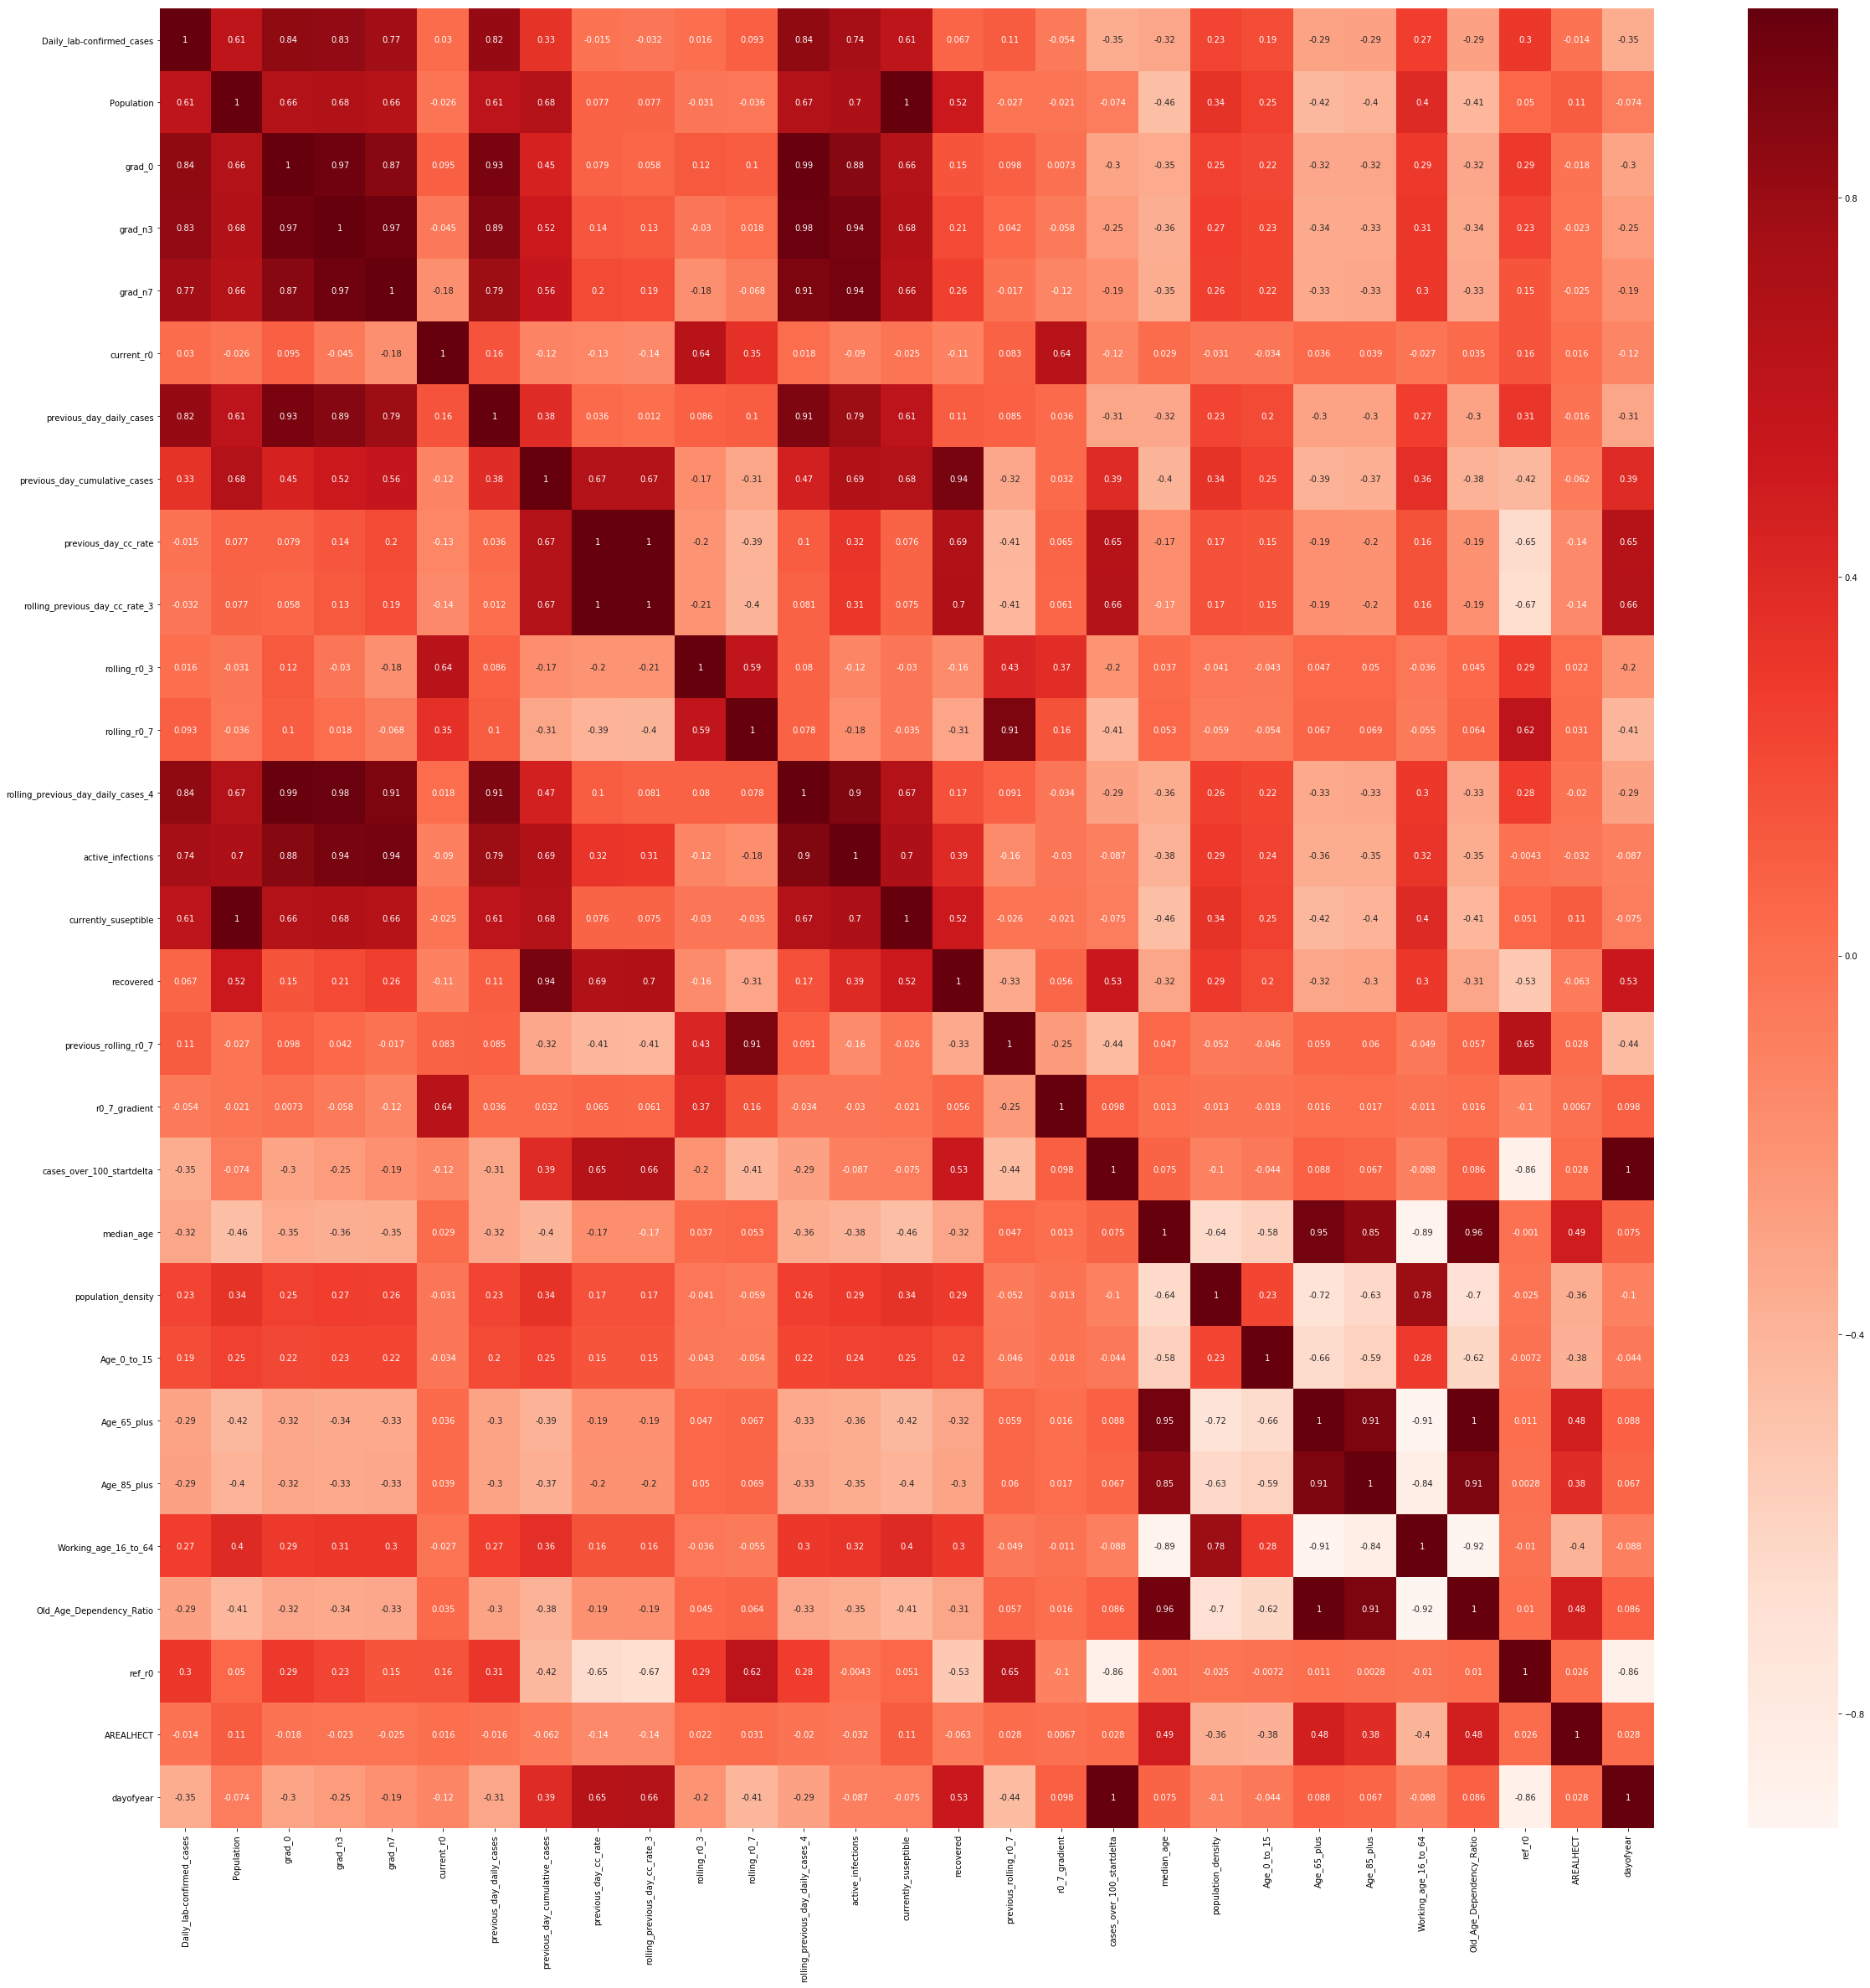

Daily_lab-confirmed_cases             1.000000
Population                            0.607984
grad_0                                0.838563
grad_n3                               0.833931
grad_n7                               0.773482
previous_day_daily_cases              0.815625
rolling_previous_day_daily_cases_4    0.836859
active_infections                     0.744972
currently_suseptible                  0.608172
Name: Daily_lab-confirmed_cases, dtype: float64


In [286]:
build_pearson_correlation_matrix_of_dataframe(40,40,df,"Daily_lab-confirmed_cases",0.5)

# XGBoost  - Predicting R0

In [287]:
print (df.head)

<bound method NDFrame.head of        Daily_lab-confirmed_cases  Population  grad_0  grad_n3  grad_n7  \
6                           14.0      261317    23.0     28.5     34.0   
7                           10.0      261317    29.0     32.5     36.0   
8                            9.0      261317    29.0     30.5     32.0   
9                            9.0      261317    33.0     28.0     23.0   
10                          15.0      261317    28.0     28.5     29.0   
...                          ...         ...     ...      ...      ...   
14992                        6.0       93663    22.0     21.0     20.0   
14993                        5.0       93663    18.0     20.0     22.0   
14994                       11.0       93663    19.0     20.5     22.0   
14995                        6.0       93663    22.0     22.0     22.0   
14996                        0.0       93663    22.0     20.0     18.0   

       current_r0  previous_day_daily_cases  previous_day_cumulative_cases  \
6  

### Printing the names of the columns in the dataframe

In [288]:
for col in df.columns: 
    print(col) 

Daily_lab-confirmed_cases
Population
grad_0
grad_n3
grad_n7
current_r0
previous_day_daily_cases
previous_day_cumulative_cases
previous_day_cc_rate
rolling_previous_day_cc_rate_3
rolling_r0_3
rolling_r0_7
rolling_previous_day_daily_cases_4
active_infections
currently_suseptible
recovered
previous_rolling_r0_7
r0_7_gradient
cases_over_100_startdelta
median_age
population_density
Age_0_to_15
Age_65_plus
Age_85_plus
Working_age_16_to_64
Old_Age_Dependency_Ratio
ref_r0
AREALHECT
dayofyear


### Separating the data into X and y (i.e. feature and target variables)

In [315]:
y = df[['current_r0']]

X = df.drop(columns=['current_r0', 'Daily_lab-confirmed_cases','Age_65_plus','Age_85_plus',
                     'Working_age_16_to_64','Old_Age_Dependency_Ratio','Population','median_age','dayofyear',
                    'AREALHECT','population_density','currently_suseptible','cases_over_100_startdelta'])

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [316]:
print (X.columns)

Index(['grad_0', 'grad_n3', 'grad_n7', 'previous_day_daily_cases',
       'previous_day_cumulative_cases', 'previous_day_cc_rate',
       'rolling_previous_day_cc_rate_3', 'rolling_r0_3', 'rolling_r0_7',
       'rolling_previous_day_daily_cases_4', 'active_infections', 'recovered',
       'previous_rolling_r0_7', 'r0_7_gradient', 'Age_0_to_15', 'ref_r0'],
      dtype='object')


### Normalizing the feature variables

In [317]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### Instantiate the XGBoost model

In [318]:
xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 0.1)

### Fitting the XGBoost model

In [319]:
xgboost_regression.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Defining a function to print out the results of a model

In [320]:
def printing_out_results_of_a_model(model,X_test,y_test):

    # Use the model on the testing data to predict the results

    y_pred = model.predict(X_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    print ("\n")
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print ("RMSE:\n")
    print (rmse)

### Printing out the results of the XGBoost model

In [321]:
printing_out_results_of_a_model(xgboost_regression,X_test,y_test)

R2 score:

77.38 %


Mean-squared error:

0.1733924169569332


RMSE:

0.41640415098427297


### Plotting the features importances for the XGBoost model

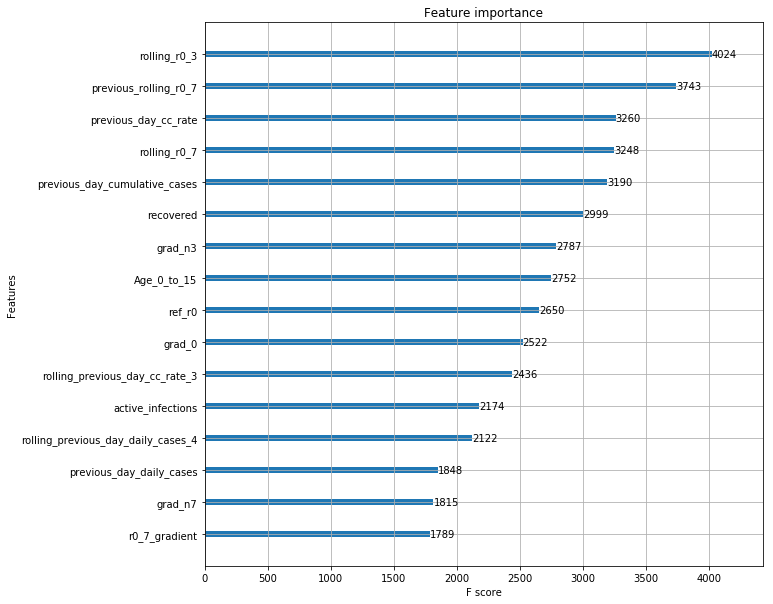

In [322]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(xgboost_regression, ax = ax)
plt.savefig('Images/xgboost_features_importance.png', bbox_inches='tight')
plt.show()       

### Plotting out one Tree of the XGBoost model

In [323]:
#xgb.to_graphviz(xgboost_regression, num_trees=1)

### Export the image of one Tree of the XGBoost model

In [324]:
format = 'png' 

image = xgb.to_graphviz(xgboost_regression, num_trees = 1)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'200'}

# image.render('Images/xgboost_tree', format = format)

### Conclusion

The XGBoost model gives good results but we have to use hyperparameters tuning to see the final result.

# Hyperparameters tuning the XGBoost model

## Random Search

In [342]:
print(xgboost_regression.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1, 'alpha': 0.1}


### Declaring the Grid for the Random Search

In [343]:
random_grid = {
    
 "n_estimators"         : range (500, 600, 10),
    
 "early_stopping_rounds": [10],

 "learning_rate"        : [ 0.01, 0.05, 0.075, 0.1, 0.15, 0.2 ],
               
 "max_depth"            : [ 5, 6, 7 ],
    
 "min_child_weight"     : [ 3, 4, 5 ],
    
 "gamma"                : [ 0.0, 0.01, 0.05 , 0.1 ],
    
 "subsample"            : [0.5, 0.6, 0.7, 0.8, 0.9 ],
    
 "colsample_bytree"     : [0.5, 0.6, 0.7, 0.8, 0.9 ]

}

### Instantiating the Random Search for the XGBoost model

In [344]:
xgb_random = RandomizedSearchCV(estimator = xgboost_regression, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

### Fitting the Random Search for the XGBoost model

In [ ]:
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.8min finished


### Printing out the best hyperparameters for the XGBoost model

In [ ]:
xgb_random.best_params_

### Printing out the results of the XGBoost model after Random Search 

In [ ]:
printing_out_results_of_a_model(xgb_random,X_test,y_test)

### Plotting the R0 Prediction Results

In [ ]:
y_pred = xgb_random.predict(X_test)

fig, ax = plt.subplots(figsize=(8,5), dpi=100)
ax.scatter(y_test, y_pred, alpha=0.5)
ax.set_aspect('equal')
ax.plot(y_test, y_test, 'r-')
plt.title('R0 Prediction Results')
plt.xlabel('Actual R0')
plt.ylabel('Predicted R0')
plt.grid(which='both', alpha=0.25)
plt.show()